In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_values = pd.read_csv("../data/raw/train_values.csv")
train_labels = pd.read_csv("../data/raw/train_labels.csv")

In [4]:
train_values.shape

(260601, 39)

In [5]:
train_labels.shape

(260601, 2)

In [7]:
train_join = train_values.set_index("building_id").join(
    train_labels.set_index("building_id")
)

In [9]:
train_join.isna().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [12]:
# Label Encoding all columns

le_lsc = LabelEncoder()  # instantiate the Label Encoder
train_join["land_surface_condition"] = le_lsc.fit_transform(
    train_join["land_surface_condition"]
)

le_ft = LabelEncoder()  # instantiate the Label Encoder
train_join["foundation_type"] = le_ft.fit_transform(train_join["foundation_type"])

le_rt = LabelEncoder()  # instantiate the Label Encoder
train_join["roof_type"] = le_rt.fit_transform(train_join["roof_type"])

le_gft = LabelEncoder()  # instantiate the Label Encoder
train_join["ground_floor_type"] = le_gft.fit_transform(train_join["ground_floor_type"])

le_oft = LabelEncoder()  # instantiate the Label Encoder
train_join["other_floor_type"] = le_oft.fit_transform(train_join["other_floor_type"])

le_pos = LabelEncoder()  # instantiate the Label Encoder
train_join["position"] = le_pos.fit_transform(train_join["position"])

le_pc = LabelEncoder()  # instantiate the Label Encoder
train_join["plan_configuration"] = le_pc.fit_transform(train_join["plan_configuration"])

le_los = LabelEncoder()  # instantiate the Label Encoder
train_join["legal_ownership_status"] = le_los.fit_transform(
    train_join["legal_ownership_status"]
)


train_join

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,2,0,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,2,2,1,...,0,0,0,0,0,0,0,0,0,3


In [47]:
# move last column to the front
cols = train_join.columns.to_list()
cols = cols[-1:] + cols[:-1]
train_join = train_join[cols]

In [48]:
train_join.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,2,2,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,1,2,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,2,2,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,2,2,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,2,2,...,0,0,0,0,0,0,0,0,0,0


In [49]:
train_join.dtypes

damage_grade                              int64
geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int64
foundation_type                           int64
roof_type                                 int64
ground_floor_type                         int64
other_floor_type                          int64
position                                  int64
plan_configuration                        int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick  

In [50]:
correlation_damage = train_join.corr()["damage_grade"].sort_values()

In [51]:
correlation_damage.head(10)

has_superstructure_cement_mortar_brick   -0.254131
ground_floor_type                        -0.180397
has_superstructure_rc_engineered         -0.179014
roof_type                                -0.173890
has_superstructure_rc_non_engineered     -0.158145
area_percentage                          -0.125221
foundation_type                          -0.100601
has_secondary_use_hotel                  -0.097942
has_secondary_use_rental                 -0.083754
has_secondary_use                        -0.079630
Name: damage_grade, dtype: float64

In [52]:
correlation_damage.tail(10)

geo_level_2_id                         0.043161
height_percentage                      0.048130
position                               0.055202
has_superstructure_adobe_mud           0.055314
count_families                         0.056151
has_superstructure_stone_flag          0.066039
legal_ownership_status                 0.085684
count_floors_pre_eq                    0.122308
has_superstructure_mud_mortar_stone    0.291325
damage_grade                           1.000000
Name: damage_grade, dtype: float64

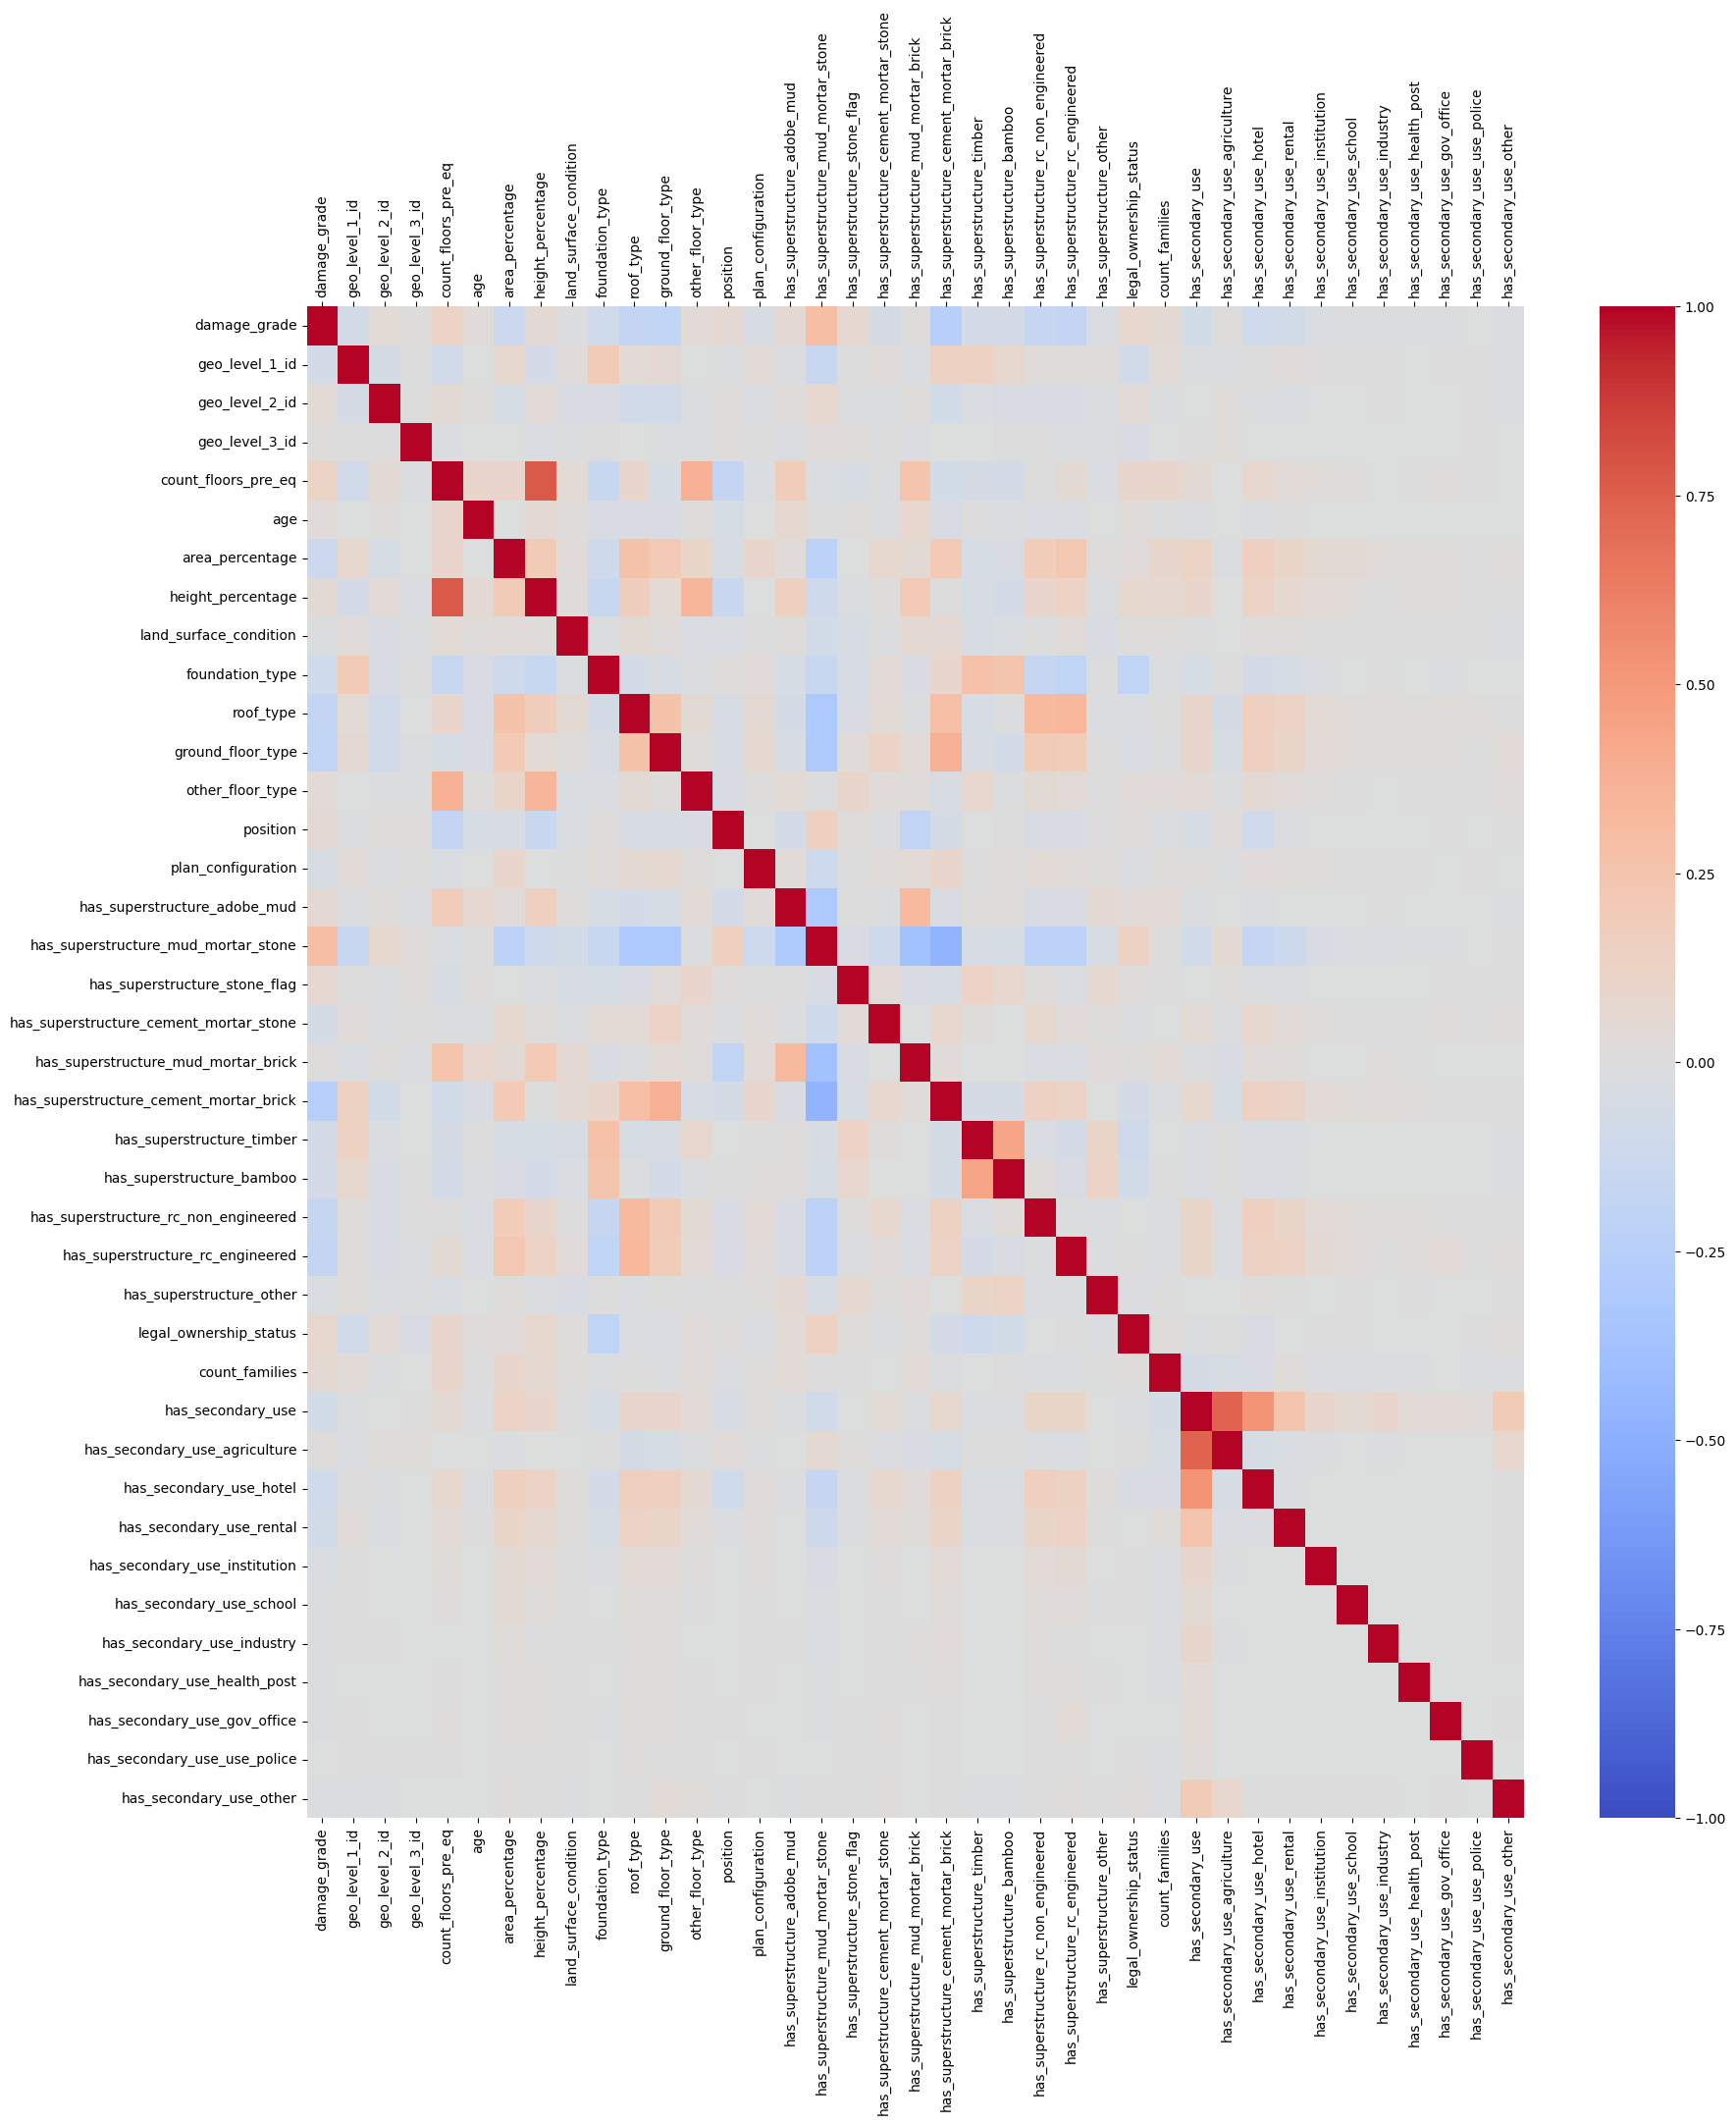

In [53]:
plt.figure(figsize=(20, 20))
plt.tick_params(axis="both", which="major", labelsize=10, top=True, labeltop=True)
sns_plot = sns.heatmap(train_join.corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.savefig("../reports/figures/correlation_matrix.png")

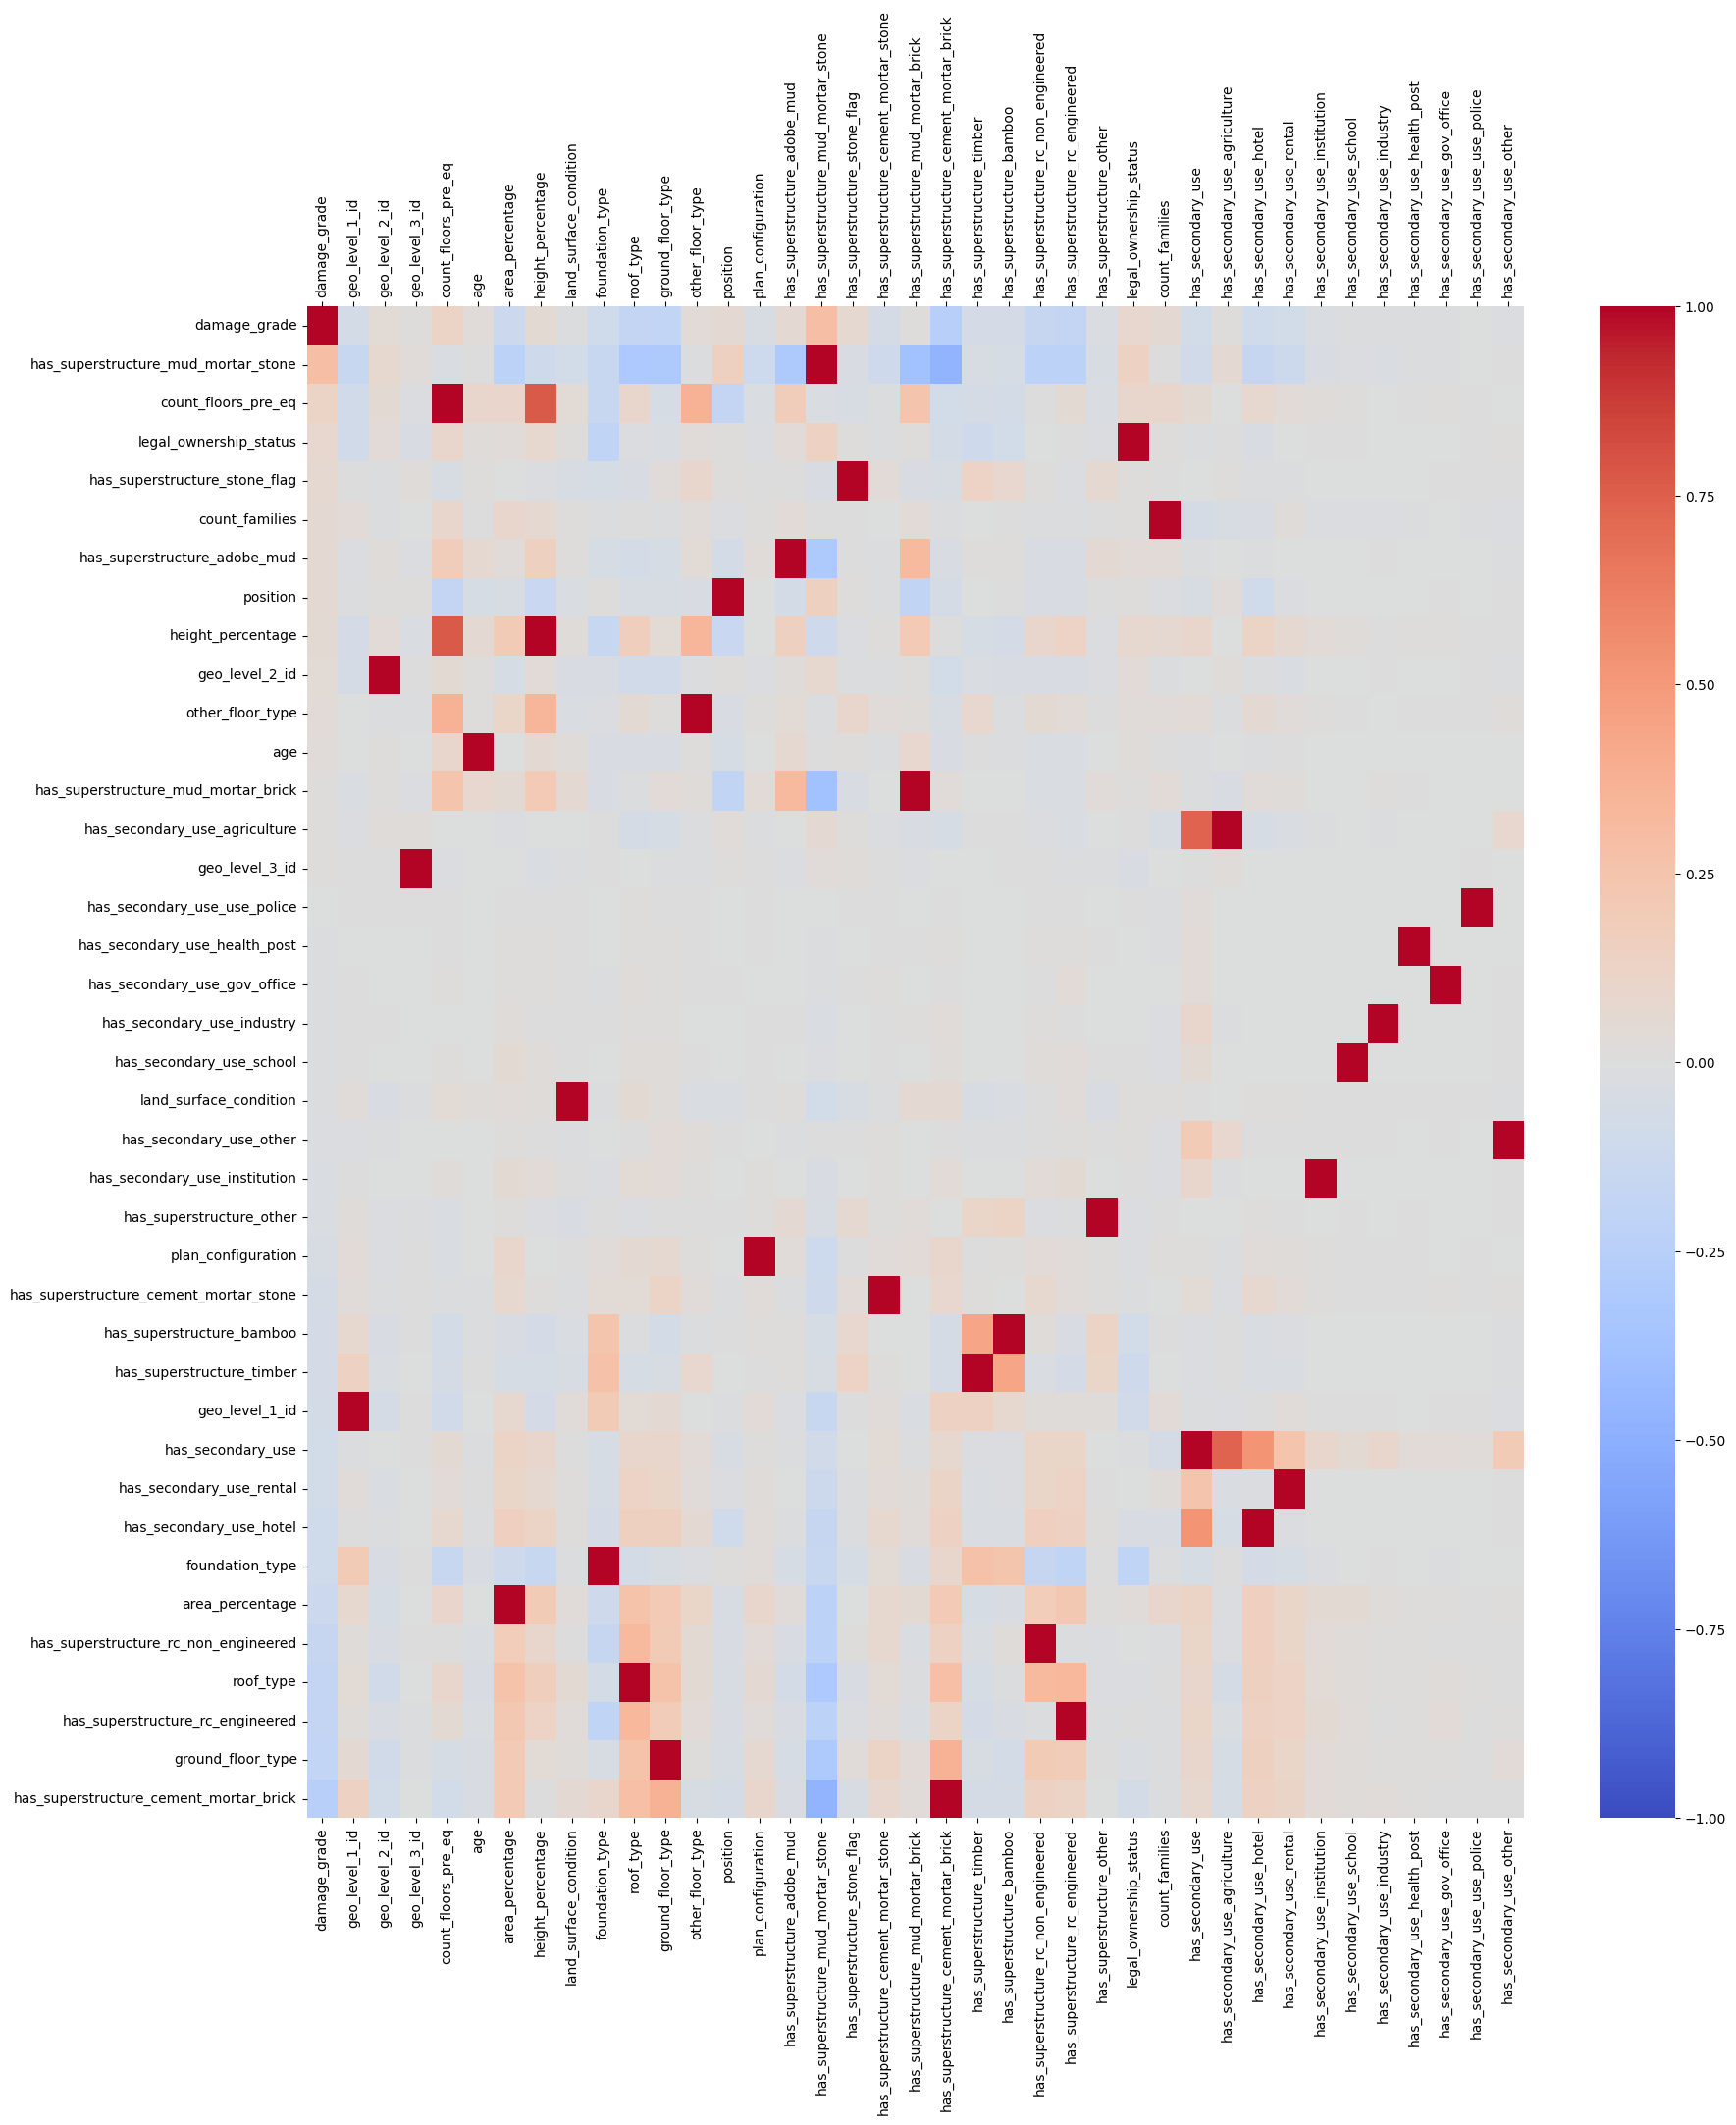

In [54]:
plt.figure(figsize=(20, 20))
plt.tick_params(axis="both", which="major", labelsize=10, top=True, labeltop=True)
sns_plot = sns.heatmap(
    train_join.corr().sort_values(by=["damage_grade"], ascending=False),
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
)
plt.savefig("../reports/figures/correlation_matrix_sorted.png")